<a href="https://colab.research.google.com/github/Krupa-Shah30/Initial-Data-FYP/blob/main/Initial_Data_FYP.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_excel('Datasets/Cleaned/elex 14-15 batch 1.xlsx')

In [ ]:
df.columns

Index(['Sr. No.', 'SAP ID', 'Name', 'Average', 'SEM-I', 'SEM-II', 'SEM-III',
       'SEM IV', 'SEM V', 'SEM VI', 'No. of KTs', 'KT Avg', 'Gender',
       'Candidature Type', 'Category', 'Home University',
       'HSC Eligibility Percentage', 'Seat Type', 'Fees Paid',
       'Admission Date', 'Uploaded Date', 'CAP Round',
       'Admitted / Uploaded Late'],
      dtype='object')

In [ ]:
df.head()

,Sr. No.,SAP ID,Name,Average,SEM-I,SEM-II,SEM-III,SEM IV,SEM V,SEM VI,...,Candidature Type,Category,Home University,HSC Eligibility Percentage,Seat Type,Fees Paid,Admission Date,Uploaded Date,CAP Round,Admitted / Uploaded Late
0,1,60001140001,ANIRUDH VISHWANATHAN,8.054000,7.38,8.07,NaN,7.07,8.64,9.11,...,Type A,Open,Mumbai,74.33,IL,123211,2014-08-12,2014-08-19,Institute Level,No
1,2,60001140002,ROHAN RAJEEV,9.690000,9.63,9.96,8.81,9.74,10.00,10.00,...,Type A,Open,Mumbai,88.33,IL,123211,2014-07-26,2014-08-14,Institute Level,No
2,3,60001140004,ANCHAN NITYANAND B.,8.590000,8.81,9.19,7.42,8.29,8.64,9.19,...,Type A,Open,Mumbai,78.50,IL,123211,2014-07-31,2014-08-14,Institute Level,No
3,4,60001140005,ARYA KANIKA SANJAY,6.950000,6.30,6.10,F,6.32,8.25,7.78,...,Type A,Open,Mumbai,69.83,IL,123211,2014-08-05,2014-08-14,Institute Level,No
4,5,60001140006,ARYA UDAYAN YASHPRIYA,8.303333,7.85,8.56,8,8.39,8.50,8.52,...,Type A,Open,Mumbai,83.00,IL,123211,2014-07-23,2014-08-14,Institute Level,No


Text(0.5, 1.0, 'Distribution of Average grades')

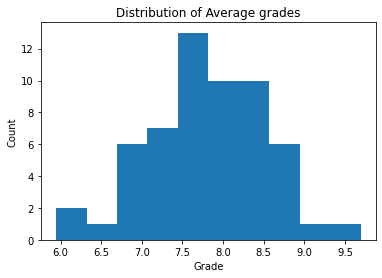

In [ ]:
plt.hist(df['Average'])
plt.xlabel('Grade')
plt.ylabel('Count')
plt.title('Distribution of Average grades')

Text(0.5, 1.0, 'Density Plot of Final Grades by Gender')

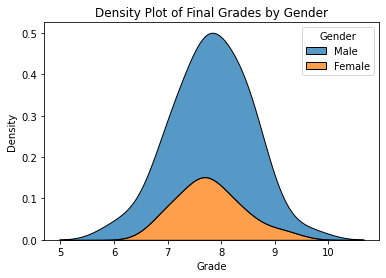

In [ ]:
import seaborn as sns
sns.kdeplot(data=df, x="Average", hue="Gender", multiple="stack")
plt.xlabel('Grade')
plt.ylabel('Density')
plt.title('Density Plot of Final Grades by Gender')

<AxesSubplot:xlabel='Average', ylabel='Density'>

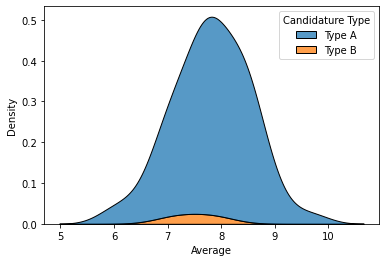

In [ ]:
sns.kdeplot(data=df, x="Average", hue="Candidature Type", multiple="stack",shade=True)

<AxesSubplot:xlabel='Average', ylabel='Density'>

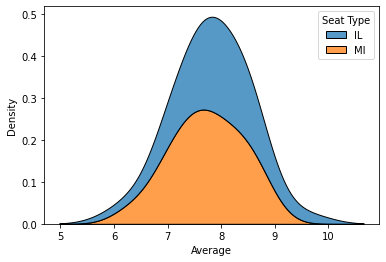

In [ ]:
sns.kdeplot(data=df, x="Average", hue="Seat Type", multiple="stack",shade=True)

In [ ]:
df.corr()['Average'].sort_values()

No. of KTs                   -0.540343
SAP ID                       -0.148469
Sr. No.                      -0.143821
HSC Eligibility Percentage    0.357633
SEM VI                        0.714704
SEM V                         0.817935
SEM IV                        0.916046
Average                       1.000000
Fees Paid                          NaN
Name: Average, dtype: float64

In [ ]:
df.dtypes

Sr. No.                                int64
SAP ID                                 int64
Name                                  object
Average                              float64
SEM-I                                 object
SEM-II                                object
SEM-III                               object
SEM IV                               float64
SEM V                                float64
SEM VI                               float64
No. of KTs                             int64
KT Avg                                object
Gender                                object
Candidature Type                      object
Category                              object
Home University                       object
HSC Eligibility Percentage           float64
Seat Type                             object
Fees Paid                              int64
Admission Date                datetime64[ns]
Uploaded Date                 datetime64[ns]
CAP Round                             object
Admitted /

In [ ]:
# Select only categorical variables
df['Name'] = df['Name'].astype('|S')
df['SEM-I'] = pd.to_numeric(df['SEM-I'], errors='coerce')
df['SEM-II'] = pd.to_numeric(df['SEM-II'], errors='coerce')
df['SEM-III'] = pd.to_numeric(df['SEM-III'], errors='coerce')
df['KT Avg'] = pd.to_numeric(df['KT Avg'], errors='coerce')
category_df = df.select_dtypes('object')
category_df=category_df.drop(['CAP Round','Admitted / Uploaded Late'],axis=1)
print(category_df)

    Gender Candidature Type Category Home University Seat Type
0     Male           Type A     Open          Mumbai        IL
1     Male           Type A     Open          Mumbai        IL
2     Male           Type A     Open          Mumbai        IL
3   Female           Type A     Open          Mumbai        IL
4     Male           Type A     Open          Mumbai        IL
5     Male           Type A     Open          Mumbai        IL
6     Male           Type A     Open          Mumbai        MI
7   Female           Type A     Open          Mumbai        MI
8     Male           Type A     Open          Mumbai        MI
9     Male           Type A     Open          Mumbai        MI
10    Male           Type A     Open          Mumbai        MI
11  Female           Type A     Open          Mumbai        IL
12    Male           Type A     Open          Mumbai        IL
13    Male           Type A     Open          Mumbai        MI
14  Female           Type A     Open          Mumbai   

In [ ]:
# One hot encode the variables
dummy_df = pd.get_dummies(category_df)
# Put the grade back in the dataframe
dummy_df['Average'] = df['Average']
dummy_df.head()

,Gender_Female,Gender_Male,Candidature Type_Type A,Candidature Type_Type B,Category_NT-D,Category_Open,Home University_Mumbai,Home University_Pune,Seat Type_IL,Seat Type_MI,Average
0,0,1,1,0,0,1,1,0,1,0,8.054000
1,0,1,1,0,0,1,1,0,1,0,9.690000
2,0,1,1,0,0,1,1,0,1,0,8.590000
3,1,0,1,0,0,1,1,0,1,0,6.950000
4,0,1,1,0,0,1,1,0,1,0,8.303333


In [ ]:
# Correlations in one-hot encoded dataframe
dummy_df.corr()['Average'].sort_values()

Home University_Mumbai    -0.245630
Seat Type_MI              -0.124898
Category_Open             -0.105732
Candidature Type_Type B   -0.079656
Gender_Female             -0.014348
Gender_Male                0.014348
Candidature Type_Type A    0.079656
Category_NT-D              0.105732
Seat Type_IL               0.124898
Home University_Pune       0.245630
Average                    1.000000
Name: Average, dtype: float64